# Descriptive statistics and visualisations of dataset

In [220]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [9]:
data_path = 'data/clean/combined/df_combined.p'

In [10]:
with open(data_path, 'rb') as p:
    df = pickle.load(p)

df.shape

(349594, 7)

In [38]:
colormap = {
    'S': '#C8042C',
    'V': '#1A4289',
    'DF': '#265BA4',
    'EL': '#BF2850',
    'SF': '#B42D27',
    'KF': '#24573E',
    'RV': '#D82E8A',
    'LA': '#E7B657',
    'ALT': '#75FB4C',
    'NB': '#1E4B57',
    'KD': '#566197',
    'FG': '#E4F04E',
    'DD': '#3470BC',
    'M': '#7A308B'
}

In [266]:
party_counts = pd.DataFrame(df['party'].value_counts(normalize = True).sort_values())
party_counts['color'] = party_counts.index.map(colormap).fillna('darkgrey')

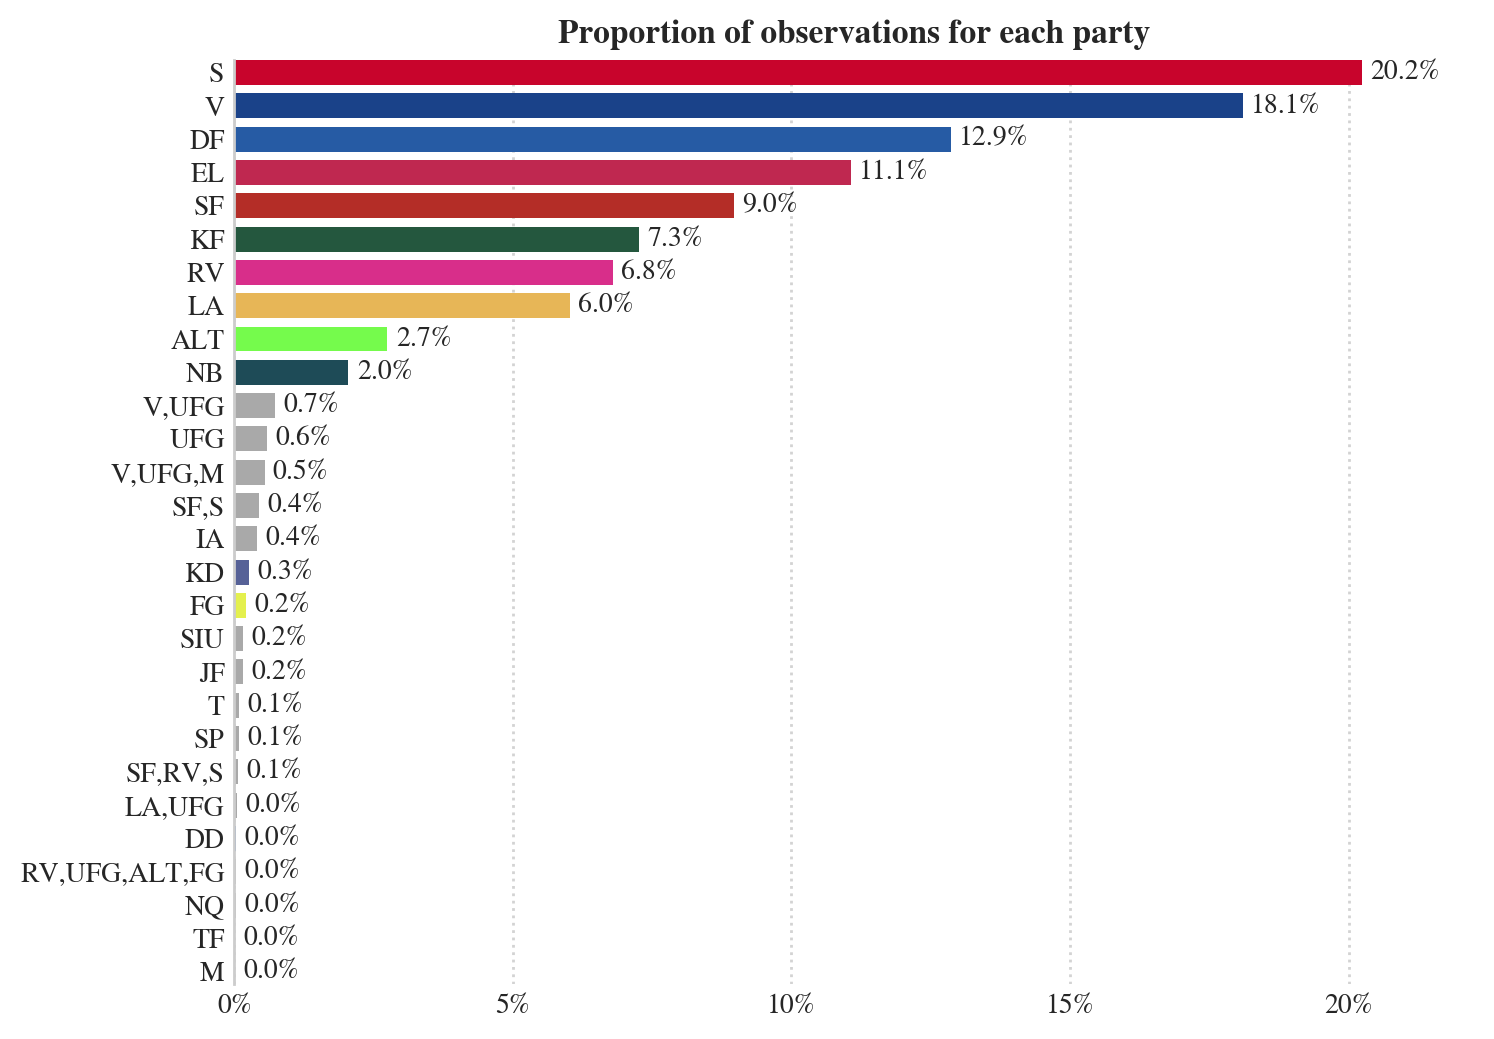

In [267]:
fig, ax = plt.subplots(figsize = (8,6))
bar_labs = party_counts['party'] * 100

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.barh(party_counts.index, width = party_counts['party'], height = 0.75, color = party_counts['color'])
ax.margins(0.1, 0)
ax.yaxis.grid(False)
ax.xaxis.grid(color='lightgrey', linestyle=':', linewidth=1) 
plt.xticks([0, 0.05, 0.1, 0.15, 0.2])
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax.bar_label(ax.containers[0], labels=[f'{lab:,.1f}%' for lab in bar_labs.values], padding = 3)

plt.title('Proportion of observations for each party', weight = 'bold')
plt.show()

In [293]:
party_counts = pd.DataFrame(df.groupby('source')['party'].value_counts(normalize = True).sort_values()).rename(columns = {'party': 'prop'})
party_counts = party_counts.reset_index()
party_counts['color'] = party_counts['party'].map(colormap).fillna('darkgrey')

In [348]:
new_cmap = party_counts[['party', 'color']].drop_duplicates(subset = 'party').set_index('party').T.to_dict(orient = 'records')[0]

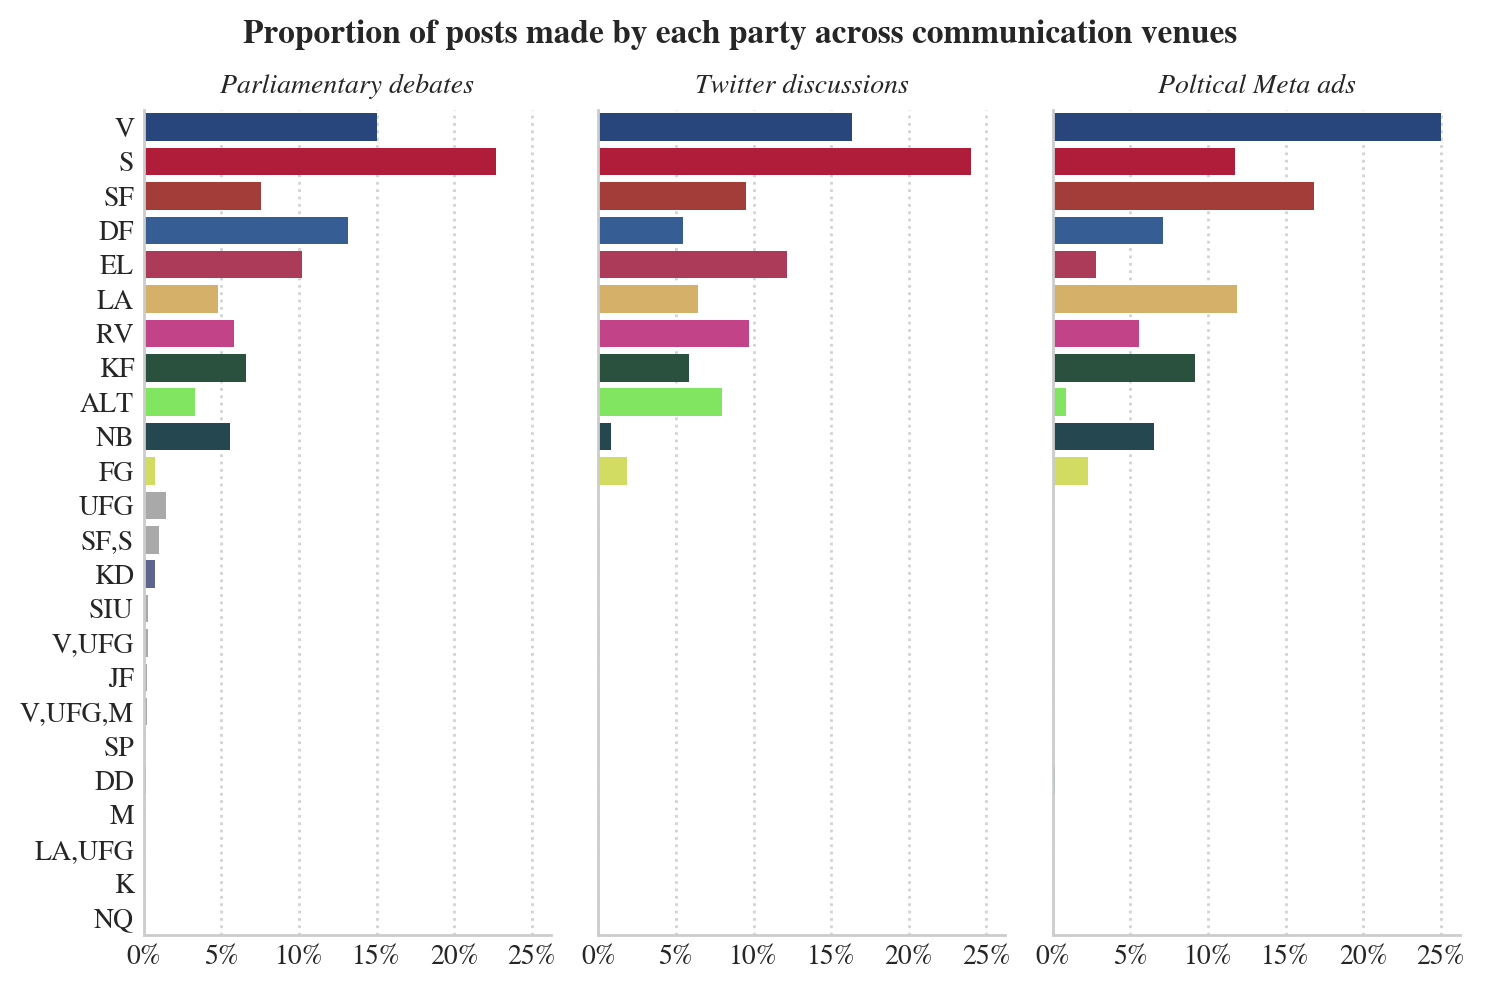

In [474]:
g = sns.catplot(
    data = party_counts,
    y = 'party',
    x = 'prop',
    palette = new_cmap,
    kind = 'bar',
    orient = 'h',
    col = 'source',
    height = 5, 
    aspect = 0.5,
    margin_titles = True,
    col_order = ['parliament', 'twitter', 'meta']
)

for ax in g.axes.flat:
    ax.xaxis.grid(color='lightgrey', linestyle=':', linewidth=1) 
    plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
    ax.xaxis.set_label_text('')
    ax.yaxis.set_label_text('')

col_labs = ['Parliamentary debates', 'Twitter discussions', 'Poltical Meta ads']

for i, lab in enumerate(col_labs):
    g.axes.flat[i].set_title(lab, style='italic', size = 10)
    #print(ax.containers[0])#ax.bar_label(ax.containers[0], labels=[f'{lab:,.1f}%' for lab in bar_labs.values], padding = 3)

g.fig.subplots_adjust(top=0.89)
g.fig.suptitle('Proportion of posts made by each party across communication venues', weight = 'bold')
g.add
plt.show()

In [12]:
list(df.columns)

['tw_handle',
 'full_name',
 'tw_bio',
 'tw_followers',
 'doc_id',
 'start_time',
 'doc',
 'source',
 'page_id',
 'meta_sponsor',
 'meta_url',
 'meta_demography',
 'meta_region',
 'meta_audience',
 'meta_platforms',
 'meta_spend',
 'meta_currency',
 'meta_impressions',
 'meta_titles',
 'end_time',
 'meta_captions',
 'meta_descriptions',
 'level',
 'wiki_name',
 'wiki_birth_year',
 'party',
 'wiki_electoral_region',
 'wiki_election_year',
 'wiki_edu',
 'wiki_votes',
 'first_name',
 'last_name',
 'parl_role',
 'year',
 'day',
 'time',
 'duration']